# Distributions

Let's first import some data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Dataframe_UDs.csv', sep=',', skiprows=4)

In [2]:
data

,Up_dur,Down_dur,id,level
0,0.515100,2.973300,0,deep
1,0.362100,1.076100,0,deep
2,0.387600,1.626900,0,deep
3,0.331500,0.851700,0,deep
4,0.703800,1.739100,0,deep
...,...,...,...,...
1548,0.834854,0.267833,9,sleep
1549,1.182382,0.248758,9,sleep
1550,0.787297,0.298405,9,sleep
1551,0.637833,0.304153,9,sleep


A simple way to discribe one variable is by listing the values that appear in its elements together with their frequency, i.e. the number of times they appear. This representation is called the distribution of the variable.

We come to distributions in a moment but first we have to distinguish types of variables.

In general there are two type of variables: categorical, those that can only take discrete values (like 1, 2, 3 or "rat", "mouse", "ferret") and continuous, that can take any value between two extremes (which can also be -Inf and +Inf). Also categorical variables can be ordered (like 'bad', 'fair', 'good') or unordered as in the previous example of animals (unless you want to see any evolutionary order in those species). Categorical variables are also sometimes called factor variables, for example in the context of ANOVA.

We first deal with discrete variable and then with continuous ones.

## Discrete

You can imagine the distribution of a variable as a simple map from values to frequencies.
We can compute the distribution of a variable with `np.histogram` function.

In our data set there is a discrete variable: `level`. Let's see what its distribution look like. But first we have to transform the values of the variable in something numpy can handle (numbers). Pandas function `map` comes in handy. This function maps strings to numeric values (or other strings if you wish) using a dictionary as a map.

In [14]:
level_num = data.level.map({'deep':1, 'light':0, 'sleep':2}).values
np.unique(level_num)

array([0, 1, 2])

Now that we got out variable mapped to numbers we can calculate the histogram.

In [15]:
np.histogram(level_num, bins=[0, 1, 2, 3])

(array([534, 518, 501]), array([0, 1, 2, 3]))

as you can see `np.histogram` returns an array with the frequencies and an array with the values. There is an additional value that doesn't appear in out variable, we'll see why when we come to continuous variables.

It's common to visualize histograms as bar graphs. We could do a bar graph out of the output of `np.histogram` but matplotlib as a useful function that integrates histogram calculation and plotting.

(array([534., 518., 501.]), array([0, 1, 2, 3]), <a list of 3 Patch objects>)

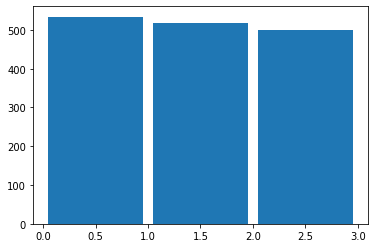

In [16]:
plt.hist(level_num, bins=[0, 1, 2, 3], rwidth=0.9)

`rwidth` parameter allows you to put some space between bars (if you set it it 1 there's no space).

As you can see there is a problem with labels on the x-axis but the numeric labels are also not so interesting for us. This can be fixed but it's even easier to let pandas take care of everything.

The method `value_count` counts the occurrencies of each value in a column of a DataFrame (the frequency), even if values are not numbers (so we don't need to do any mapping). There is also a pandas method `plot` to plot the result. And everything can be written in just one line.

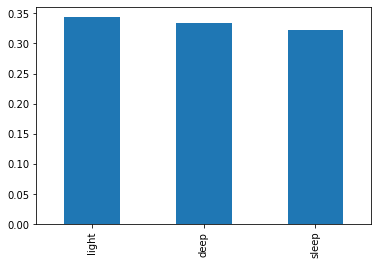

In [3]:
data.level.value_counts().plot(kind='bar')

With pandas it's very easy to take a subsample of your data. And of course when you take a random subsample you would expect your distribution to be roughly the same.

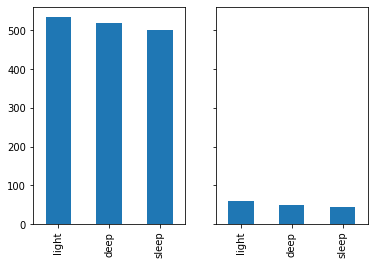

In [9]:
subsample = data.sample(frac=.1)
fig, axs = plt.subplots(ncols=2, sharey=True)
data.level.value_counts().plot(kind='bar', ax=axs[0])
subsample.level.value_counts().plot(kind='bar', ax=axs[1])

Given the different number of elements in the two samples it's not easy to compare their distribution.
In this case it's still feasible given the low number of levels of the variable but in general when you are comparing two distributions with different number of elements it's better to divide each count by the number of elements, this transforms the frequency in a fraction or probability.
You can do this easily with `plt.hist`.

(array([0.34385061, 0.33354797, 0.32260142]),
 array([0, 1, 2, 3]),
 <a list of 3 Patch objects>)

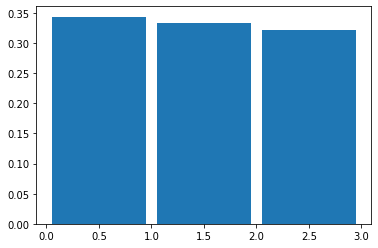

In [17]:
plt.hist(level_num, bins=[0, 1, 2, 3], rwidth=0.9, density=True)

It's quite easy with pandas too, the parameter here is called `normalize`.

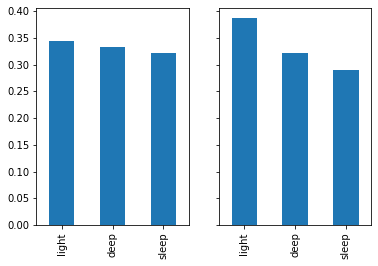

In [18]:
fig, axs = plt.subplots(ncols=2, sharey=True)
data.level.value_counts(normalize=True).plot(kind='bar', ax=axs[0])
subsample.level.value_counts(normalize=True).plot(kind='bar', ax=axs[1])

These representation of discrete distributions are called probability mass functions (PMF), because in this graph you can read the probability mass (in contrast to *density* for continuous variables) corresponding to each level of the variable.

## Continuous

When we treat continuous variable it doesn't make sense to list the frequencies of each "level" since it would be an infinite list (between any two values of the variable there are still infinite values). Even if we were trying to compile this list the probability associated to any value would be not really informative, since each exact value has a probability of zero. You can easily understand this as the limiting case of a discrete distribution with increasing number of levels. As you increase the number of levels of the variable the probability of level decreases, so that when you reach infinite levels the probability will be zero. You can try this in the following code playing with `n_levels`.

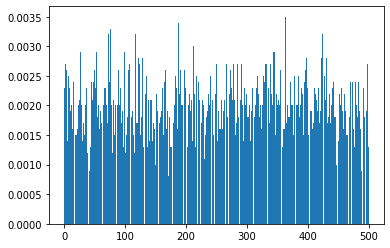

In [33]:
n_levels = 500
justavariable = np.random.randint(0, n_levels, 10000)
_ = plt.hist(justavariable, bins=range(n_levels+1), rwidth=.9, density=True)

## Histograms

## KDE

## Outliers

## Stats

### Mean, median, mode

### standard deviation

### range, quantiles

## (t-test)